In [1]:
import os
os.environ["SOCCERDATA_DIR"] = "../soccerdata"

import json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.lines import Line2D
from matplotlib import font_manager

# Load data

In [30]:
with open("../sofascore/data/shotmap.json") as f:
    shotmap = json.load(f)

shots = pd.json_normalize(shotmap["shotmap"])
shots

,isHome,shotType,situation,bodyPart,goalMouthLocation,xg,id,time,addedTime,timeSeconds,...,draw.end.y,draw.goal.x,draw.goal.y,blockCoordinates.x,blockCoordinates.y,blockCoordinates.z,draw.block.x,draw.block.y,xgot,goalType
0,True,miss,penalty,right-foot,close-left,0.788400,2247983,90,7.0,5817,...,0,42.4,98.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,block,assisted,right-foot,low-centre,0.043258,2247976,90,6.0,5702,...,0,48.3,81.0,11.5,56.5,0.0,56.5,11.5,NaN,NaN
2,True,save,assisted,head,low-right,0.058861,2247967,90,NaN,5353,...,0,52.3,89.2,1.4,48.4,0.0,48.4,1.4,0.1117,NaN
3,True,miss,assisted,right-foot,close-left,0.030304,2247958,86,NaN,5124,...,0,41.0,94.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,True,save,free-kick,right-foot,low-right,0.051087,2247950,84,NaN,5000,...,0,53.7,92.4,1.1,48.9,0.0,48.9,1.1,0.2494,NaN
5,False,goal,assisted,right-foot,low-left,0.979292,2335247,76,NaN,4546,...,0,48.1,93.7,NaN,NaN,NaN,NaN,NaN,0.8781,regular
6,False,miss,regular,left-foot,high-left,0.031440,2247925,76,NaN,4514,...,0,25.4,52.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,False,goal,free-kick,left-foot,low-right,0.047621,2335246,71,NaN,4211,...,0,52.8,93.7,NaN,NaN,NaN,NaN,NaN,0.1199,regular
8,True,miss,regular,right-foot,left,0.169428,2247890,67,NaN,3982,...,0,26.7,90.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,True,block,assisted,left-foot,low-right,0.167094,2247889,67,NaN,3981,...,0,52.5,81.0,4.0,56.5,0.0,56.5,4.0,NaN,NaN


In [80]:
# Antwerp cumulative xG
home_xg_cum = shots[shots["isHome"] == True][["isHome", "shotType", "xg", "timeSeconds", "player.name"]]
home_xg_cum["minute"] = round(home_xg_cum["timeSeconds"]/60).astype(int)
home_xg_cum.sort_values(by="minute", inplace=True)
home_xg_cum["xg_cum"] = home_xg_cum["xg"].cumsum()

# Shakhtar cumulative xG
away_xg_cum = shots[shots["isHome"] == False][["isHome", "shotType", "xg", "timeSeconds", "player.name"]]
away_xg_cum["minute"] = round(away_xg_cum["timeSeconds"]/60).astype(int)
away_xg_cum.sort_values(by="minute", inplace=True)
away_xg_cum["xg_cum"] = away_xg_cum["xg"].cumsum()
away_xg_cum

,isHome,shotType,xg,timeSeconds,player.name,minute,xg_cum
28,False,save,0.019198,52,Taras Stepanenko,1,0.019198
22,False,block,0.043569,1319,Taras Stepanenko,22,0.062766
23,False,block,0.127193,1317,Danylo Sikan,22,0.189960
21,False,miss,0.204596,1368,Mykola Matviyenko,23,0.394555
20,False,block,0.027821,1431,Oleksandr Zubkov,24,0.422376
19,False,save,0.023567,1964,Dmytro Kryskiv,33,0.445944
15,False,goal,0.457531,2875,Danylo Sikan,48,0.903475
16,False,save,0.161777,2870,Yehor Nazaryna,48,1.065251
17,False,post,0.020221,2859,Georgiy Sudakov,48,1.085472
14,False,block,0.059351,3295,Yukhym Konoplia,55,1.144824


In [214]:
home_goals = home_xg_cum[home_xg_cum["shotType"] == "goal"][["isHome", "minute", "player.name", "xg_cum"]]
home_goals["scorechart"] = home_goals["minute"].astype(str) + "'" + " " + home_goals["player.name"]
home_goal_count = len(home_goals)

away_goals = away_xg_cum[away_xg_cum["shotType"] == "goal"][["isHome", "minute", "player.name", "xg_cum"]]
away_goals["scorechart"] = away_goals["minute"].astype(int).astype(str) + "'" + " " + away_goals["player.name"]
away_goal_count = len(away_goals)
away_goals


,isHome,minute,player.name,xg_cum,scorechart
15,False,48,Danylo Sikan,0.903475,48' Danylo Sikan
7,False,70,Yaroslav Rakitskyi,1.331321,70' Yaroslav Rakitskyi
5,False,76,Danylo Sikan,2.342053,76' Danylo Sikan


In [39]:
home_xg_total = round(home_xg_cum["xg"].sum(), 2).astype(str)
away_xg_total = round(away_xg_cum["xg"].sum(), 2).astype(str)

# Plot xG flow-chart

In [221]:
def set_plot_title(suptitle, title):    
    plt.suptitle(suptitle, fontsize=20, fontproperties=font_properties, y=1)
    plt.title(title, fontsize=14, fontproperties=font_properties, color="gray", pad=20)

In [222]:
def annotate_goals(goals):
    for i, row in goals.iterrows():
        facecolor = "steelblue" if row["isHome"] else "tomato"
        
        plt.text(
            row["minute"], 
            row["xg_cum"] + 0.2, 
            row["scorechart"], 
            ha="center", 
            va="center", 
            fontsize=10, 
            color="white", 
            bbox=dict(
                facecolor=facecolor,
                edgecolor="None",
                boxstyle="round,pad=0.2"
            )
        )
        

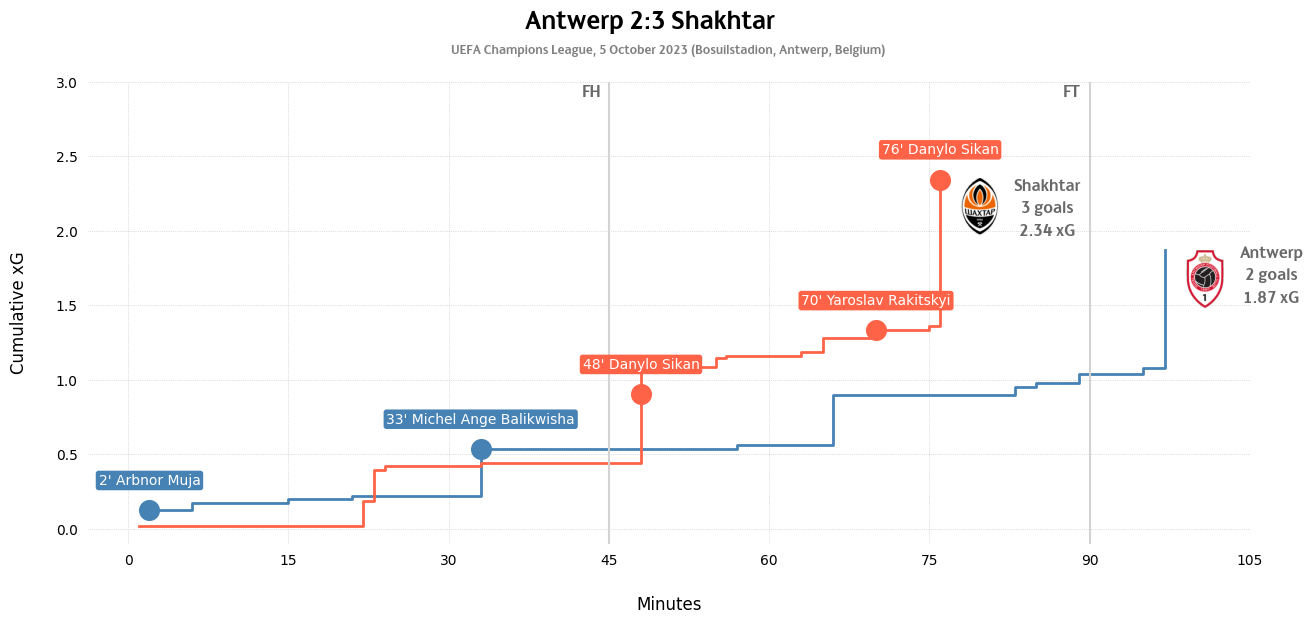

In [266]:
fig, ax = plt.subplots(figsize=(15,6))

font_properties = font_manager.FontProperties(fname="../fonts/Champions-Bold.ttf")

set_plot_title(
    suptitle="Antwerp 2:3 Shakhtar", 
    title="UEFA Champions League, 5 October 2023 (Bosuilstadion, Antwerp, Belgium)"
)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.step(x=home_xg_cum["minute"], y=home_xg_cum["xg_cum"], where="post", color="steelblue", label=f"Antwerp {home_xg_total}", linewidth=2)  
ax.step(x=away_xg_cum["minute"], y=away_xg_cum["xg_cum"], where="post", color="tomato", label= f"Shakhtar {away_xg_total}", linewidth=2)

ax.scatter(x=home_goals["minute"], y=home_goals["xg_cum"], marker="o", s=200, color="steelblue")
ax.scatter(x=away_goals["minute"], y=away_goals["xg_cum"], marker="o", s=200, color="tomato")

plt.xticks([0, 15, 30, 45, 60, 75, 90, 105])
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])

ax.tick_params(axis="both", which="both", bottom=False, top=False, left=False, right=False)
ax.grid(True, linestyle="dotted", alpha=0.5, color="gray", linewidth=0.5)

ax.axvline(x=45, color="lightgray")
ax.axvline(x=90, color="lightgray")
plt.text(42.5, 2.9, "FH", color="dimgray", fontsize=13, fontproperties=font_properties)
plt.text(87.5, 2.9, "FT", color="dimgray", fontsize=13, fontproperties=font_properties)

annotate_goals(home_goals)
annotate_goals(away_goals)

stat_text_options = dict(ha="center", va="center", color="dimgray", fontsize=13, fontproperties=font_properties)
plt.text(107, 1.85, "Antwerp", **stat_text_options)
plt.text(107, 1.7, f"{home_goal_count} goals", **stat_text_options)
plt.text(107, 1.55, f"{home_xg_total} xG", **stat_text_options)

plt.text(86, 2.3, "Shakhtar", **stat_text_options)
plt.text(86, 2.15, f"{away_goal_count} goals", **stat_text_options)
plt.text(86, 2, f"{away_xg_total} xG", **stat_text_options)

plt.ylabel("Cumulative xG", fontsize=12, labelpad=20)
plt.xlabel("Minutes", fontsize=12, labelpad=20)

home_logo = mpimg.imread("../images/antwerp_logo.png")
ax_home_logo = fig.add_axes([0.82, 0.5, 0.1, 0.1])
ax_home_logo.imshow(home_logo)
ax_home_logo.axis("off")

away_logo = mpimg.imread("../images/shakhtar_logo.png")
ax_away_logo = fig.add_axes([0.67, 0.62, 0.1, 0.1])
ax_away_logo.imshow(away_logo)
ax_away_logo.axis("off")

plt.savefig("../report/xg_flow_chart.png", dpi=300, bbox_inches="tight")

plt.show()